# Normalize Matrices

## Purpose: 

* Transform Raw Counts Matrices to DESeq2 Scaled Matrices
* Visually Inspect Normalized Matrices
* View Violin Plots of Peak Widths per Assay

## Packages and Options

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-m8ld0k_s because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Variables

In [3]:
assays=["ATAC","H3K4me1","H3K4me3","H3K27Ac","H3K27me3"]
peak_width_dict={}
assay_matrices={}


## Transform Raw Counts to DESeq2 Scaled Counts

In [4]:

for assay in assays: 

    # read matrix and sort first by chromosome and then by start coordinate
    assay_specific_matrix = pd.read_csv(
        "/home/yraghav/MIT-Fraenkel-Lab/Projects/CHDI_NeuroLINCS/advanced_analysis/Ordinal_Regression/1_feature_generation_and_pre_processing/deeptools/output/matrices/raw/{}_raw_counts_matrix.tab".format(
            assay), 
        sep="\t").sort_values(["#'chr'","'start'"])

    # get the length 
    assay_specific_matrix["Length"] = assay_specific_matrix["'end'"] - assay_specific_matrix["'start'"]
    
    # update peak_width_dict with Pandas dataframe 
    # "Assay" column is just assay name multiplied by number of regions (for creation of table)
    peak_width_dict[assay]=pd.DataFrame(
        {'Assay':[assay for _ in range(0,len(assay_specific_matrix["Length"]))],
        'Length': assay_specific_matrix["Length"].to_list()}
    )

    # specify start and end coordinates as string for creation of index 
    assay_specific_matrix = assay_specific_matrix.astype({"'start'":str, "'end'":str})
    
    # create index column as "chr:start-end"
    assay_specific_matrix["Index"] = assay_specific_matrix["#'chr'"] + ":" + assay_specific_matrix["'start'"] + "-" + assay_specific_matrix["'end'"]
    assay_specific_matrix.index=assay_specific_matrix["Index"]

    # drop extraneous columns 
    assay_specific_matrix = assay_specific_matrix.drop(["#'chr'","'start'", "'end'", "Length", "Index"], axis="columns")
    
    # load scaling factors file
    scaling_factors=pd.read_csv(
        "/home/yraghav/MIT-Fraenkel-Lab/Projects/CHDI_NeuroLINCS/advanced_analysis/Ordinal_Regression/1_feature_generation_and_pre_processing/deeptools/output/scaling_factors/{}_scaling_factors.tab".format(
            assay), sep="\t")
    
    # apply scaling factors per column 
    for sample in assay_specific_matrix.columns: 
        scaling_factor = scaling_factors[scaling_factors["sample"]==sample.strip("'")]["scalingFactor"].to_list()[0]
        assay_specific_matrix[sample] = assay_specific_matrix[sample].apply(lambda x: x/scaling_factor)

    # append scaled matrix to dict 
    assay_matrices[assay] = assay_specific_matrix

## Visually Inspect Scaled Matrices

In [5]:
for assay in assay_matrices: 
    assay
    assay_matrices[assay]

'ATAC'

,'201209Fra_D20-6795_1.trim.nodup.no_chrM_MT','201209FraA_D20-6801_1.trim.nodup.no_chrM_MT','72-20_rep3_210203Fra_D21-1102_1.trim.merged.nodup.no_chrM_MT','201209FraB_D20-7056_1.trim.nodup.no_chrM_MT','56-22_rep3_210203Fra_D21-1101_1.trim.merged.nodup.no_chrM_MT','201209FraB_D20-6811_1.trim.nodup.no_chrM_MT','201209FraA_D20-6802_1.trim.nodup.no_chrM_MT','201209FraB_D20-6808_1.trim.nodup.no_chrM_MT','201209FraA_D20-6803_1.trim.nodup.no_chrM_MT','201209FraB_D20-6809_1.trim.nodup.no_chrM_MT','22-20_rep3_210203Fra_D21-1100_1.trim.merged.nodup.no_chrM_MT','201209FraA_D20-6804_1.trim.nodup.no_chrM_MT'
Index,,,,,,,,,,,,
chr1:56120-56475,10.452051,13.398295,57.940479,11.367611,13.992921,24.659696,16.166282,10.253255,8.558979,14.861996,12.163174,65.635939
chr1:66798-67060,17.420085,23.142509,23.702923,11.367611,26.339616,18.741369,18.475751,16.405209,13.227513,16.985138,24.326347,49.591599
chr1:180739-181148,25.259124,21.924482,51.356334,17.488632,25.516503,19.727757,30.023095,21.531836,14.783691,16.985138,28.068862,37.922987
chr1:629082-630053,56043.898615,97655.298417,50903.344746,63245.890171,55594.699152,73510.554350,91517.321016,73205.167641,44541.705571,68242.038217,82486.901198,133973.162194
chr1:630221-630503,10356.240746,18147.381242,13540.953384,12226.302903,10502.922051,13831.130400,17314.087760,14051.061212,8583.877996,12900.212314,15044.910180,25299.008168
...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:12446469-12446811,20.033098,41.412911,92.178035,14.865338,9.054243,23.673308,43.879908,21.531836,22.564581,42.462845,5.613772,65.635939
chrY:12448053-12448296,20.904102,29.232643,23.702923,20.986359,15.639147,27.618860,24.249423,18.455860,14.005602,14.861996,25.261976,55.425904
chrY:12450934-12451269,15.678077,51.157125,118.514617,20.111927,25.516503,26.632472,27.713626,32.810417,26.455026,39.278132,36.489521,71.470245


'H3K4me1'

,'20-20_H3K4me1_rep2_210115Fra_D20-3774-2_NA_sequence.fastq.merged.nodup.no_chrM_MT','22-20_H3K4me1_rep1_210115Fra_D20-5403-3_NA_sequence.fastq.merged.nodup.no_chrM_MT','22-20_H3K4me1_rep3-1_210115Fra_D20-4761-2_NA_sequence.fastq.merged.nodup.no_chrM_MT','56-22_H3K4me1_rep1_210115Fra_D20-4168-2_NA_sequence.fastq.merged.nodup.no_chrM_MT','56-22_H3K4me1_rep1-1_210115Fra_D20-5523-4_NA_sequence.fastq.merged.nodup.no_chrM_MT','56-22_H3K4me1_rep3_210115Fra_D20-3539-2_NA_sequence.fastq.merged.nodup.no_chrM_MT','72-20_H3K4me1_rep3_210115Fra_D20-3542-1_NA_sequence.fastq.merged.nodup.no_chrM_MT','22-20_H3K4me1_rep2_210115Fra_D20-3771-1_NA_sequence.fastq.merged.nodup.no_chrM_MT','72-20_H3K4me1_rep1_210115Fra_D20-4025-1_NA_sequence.fastq.merged.nodup.no_chrM_MT','22-20_H3K4me1_rep3_210115Fra_D20-3335-1_NA_sequence.fastq.merged.nodup.no_chrM_MT','20-20_H3K4me1_rep1_210115Fra_D20-4024-2_NA_sequence.fastq.merged.nodup.no_chrM_MT','72-20_H3K4me1_rep2_210115Fra_D20-3974-1_NA_sequence.fastq.merged.nodup.no_chrM_MT','20-20_H3K4me1_rep3_210115Fra_D20-3536-1_NA_sequence.fastq.merged.nodup.no_chrM_MT','56-22_H3K4me1_rep2_210115Fra_D20-3777-2_NA_sequence.fastq.merged.nodup.no_chrM_MT'
Index,,,,,,,,,,,,,,
chr1:777598-778094,42.310822,28.633761,19.634311,45.468324,33.628319,42.053364,20.457867,14.991005,24.564538,9.832842,15.483742,1.580112,20.785219,6.628003
chr1:812028-812445,47.192840,25.906736,26.997178,40.921491,53.097345,36.252900,15.586946,15.990406,21.214828,14.749263,0.998951,2.106816,26.558891,14.913007
chr1:843880-846421,353.132628,272.702482,231.930298,321.309488,430.088496,317.575406,150.998539,150.909454,176.418044,129.793510,52.444933,8.427262,173.210162,96.934548
chr1:846525-846980,42.310822,24.543223,25.770033,34.859048,40.707965,43.503480,14.612762,12.992205,27.914247,15.732547,3.496329,0.526704,23.094688,11.599006
chr1:858133-859349,104.149715,77.720207,56.448644,83.358594,113.274336,98.607889,39.941549,54.967020,49.129075,41.297935,15.983218,3.160223,63.510393,22.369511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX:155767962-155771723,476.810415,319.061903,261.381765,409.214914,523.893805,387.180974,184.120799,145.912453,228.896829,178.957719,14.484791,12.377541,212.471132,110.190555
chrX:155819525-155820214,81.366965,61.358058,36.814333,66.686875,69.026549,49.303944,20.457867,13.991605,36.846807,17.699115,10.488987,1.843464,23.094688,16.570008
chrX:155887996-155888283,32.546786,9.544587,11.044300,27.280994,35.398230,24.651972,11.690209,5.996402,7.815989,11.799410,0.000000,0.790056,18.475751,8.285004


'H3K4me3'

,'20-20_H3K4me3_rep3_210115Fra_D20-4765-2_NA_sequence.fastq.merged.nodup.no_chrM_MT','22-20_H3K4me3_rep3_210115Fra_D20-4762-2_NA_sequence.fastq.merged.nodup.no_chrM_MT','72-20_H3K4me3_rep1_210115Fra_D20-5527-3_NA_sequence.fastq.merged.nodup.no_chrM_MT','72-20_H3K4me3_rep3_210115Fra_D20-3541-1_NA_sequence.fastq.merged.nodup.no_chrM_MT','20-20_H3K4me3_rep1_210115Fra_D20-5407-4_NA_sequence.fastq.merged.nodup.no_chrM_MT','22-20_H3K4me3_rep1_210115Fra_D20-5404-3_NA_sequence.fastq.merged.nodup.no_chrM_MT','56-22_H3K4me3_rep3_210115Fra_D20-3540-2_NA_sequence.fastq.merged.nodup.no_chrM_MT','56-22_H3K4me3_rep1_210115Fra_D20-5524-4_NA_sequence.fastq.merged.nodup.no_chrM_MT','72-20_H3K4me3_rep2_210115Fra_D20-5201-4_NA_sequence.fastq.merged.nodup.no_chrM_MT','56-22_H3K4me3_rep2_210115Fra_D20-3778-1_NA_sequence.fastq.merged.nodup.no_chrM_MT','20-20_H3K4me3_rep2_210115Fra_D20-3775-1_NA_sequence.fastq.merged.nodup.no_chrM_MT','22-20_H3K4me3_rep2_210115Fra_D20-3772-1_NA_sequence.fastq.merged.nodup.no_chrM_MT'
Index,,,,,,,,,,,,
chr1:777447-779497,165.330661,220.564385,411.913054,329.196466,570.799458,263.386397,372.329173,394.230769,424.320828,219.396852,332.653718,210.248553
chr1:779576-780466,27.555110,39.734025,74.456587,59.949516,106.707317,44.380125,94.140047,97.355769,72.445019,52.717265,66.530744,36.601975
chr1:825910-827899,154.058116,220.564385,377.086586,297.644089,552.168022,275.928606,320.499260,387.019231,439.844761,186.060935,313.338341,204.290092
chr1:828175-828433,6.888778,1.621797,8.406389,13.672697,18.631436,12.542209,8.462027,14.423077,12.936611,7.752539,13.949995,6.809670
chr1:844631-844974,1.878758,8.108985,10.808214,18.931426,35.569106,16.401351,15.866300,9.615385,14.230272,3.101016,11.803842,5.107252
...,...,...,...,...,...,...,...,...,...,...,...,...
chrX:155958666-155960245,90.180361,88.387934,259.397142,170.382836,411.585366,110.950314,199.915380,221.153846,280.724450,90.704706,210.322996,96.186585
chrX:156016392-156016788,0.000000,9.730782,22.817341,11.569205,0.000000,11.577424,22.212820,22.836538,29.754204,7.752539,0.000000,6.809670
chrY:5003106-5003427,8.767535,15.407071,26.420079,21.034918,40.650407,14.471780,19.039560,26.442308,29.754204,11.628808,18.242301,14.470548


'H3K27Ac'

,'20-20_H3K27Ac_rep2_210115Fra_D20-3776-1_NA_sequence.fastq.merged.nodup.no_chrM_MT','72-20_H3K27Ac_rep3_210115Fra_D20-4895-3_NA_sequence.fastq.merged.nodup.no_chrM_MT','22-20_H3K27Ac_rep2_210115Fra_D20-3773-2_NA_sequence.fastq.merged.nodup.no_chrM_MT','72-20_H3K27Ac_rep1_210115Fra_D20-5526-3_NA_sequence.fastq.merged.nodup.no_chrM_MT','20-20_H3K27Ac_rep2-1_210115Fra_D20-5076-3_NA_sequence.fastq.merged.nodup.no_chrM_MT','56-22_H3K27Ac_rep1_210115Fra_D20-5522-4_NA_sequence.fastq.merged.nodup.no_chrM_MT','22-20_H3K27Ac_rep1_210115Fra_D20-5402-3_NA_sequence.fastq.merged.nodup.no_chrM_MT','22-20_H3K27Ac_rep3_210115Fra_D20-4763-1_NA_sequence.fastq.merged.nodup.no_chrM_MT','20-20_H3K27Ac_rep1_210115Fra_D20-5406-4_NA_sequence.fastq.merged.nodup.no_chrM_MT','20-20_H3K27Ac_rep3_210115Fra_D20-3538-1_NA_sequence.fastq.merged.nodup.no_chrM_MT','56-22_H3K27Ac_rep3_210115Fra_D20-4894-3_NA_sequence.fastq.merged.nodup.no_chrM_MT','72-20_H3K27Ac_rep2_210115Fra_D20-5200-4_NA_sequence.fastq.merged.nodup.no_chrM_MT','20-20_H3K27Ac_rep3-1_210115Fra_D20-4767-3_NA_sequence.fastq.merged.nodup.no_chrM_MT','56-22_H3K27Ac_rep2_210115Fra_D20-5078-3_NA_sequence.fastq.merged.nodup.no_chrM_MT'
Index,,,,,,,,,,,,,,
chr1:778236-779421,41.869606,35.613593,21.019799,117.346346,163.804071,142.938822,126.457777,49.075454,182.463254,51.116211,55.915505,116.461659,12.430675,75.908909
chr1:826712-827854,11.108263,20.032646,10.848929,69.710701,97.010178,71.469411,112.406913,33.301201,133.468491,17.734196,31.064170,71.970688,3.824823,33.959249
chr1:958786-959213,5.981372,11.871198,5.424464,24.398745,30.216285,38.593482,32.316987,14.021558,60.821085,8.345504,23.076240,28.788275,2.390514,9.988014
chr1:1012976-1013414,7.690336,5.935599,2.712232,23.236900,34.987277,45.740423,40.747506,18.403295,42.236864,17.734196,15.975859,31.405391,2.390514,19.976029
chr1:1013515-1013891,5.981372,3.709749,3.390290,20.913210,38.167939,45.740423,47.772938,7.887126,52.373712,16.691008,13.313216,26.171159,1.912412,21.973632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX:155641392-155641820,13.671708,11.871198,8.136697,39.502730,57.251908,41.452258,37.937333,13.145211,69.268458,18.777384,9.763025,30.096833,5.737235,19.976029
chrX:155770022-155770479,7.690336,14.838997,5.424464,19.751365,41.348601,42.881647,37.937333,11.392516,42.236864,12.518256,9.763025,24.862601,3.824823,13.983220
chrX:155881365-155881768,5.981372,6.677549,2.712232,29.046125,44.529262,41.452258,57.608543,14.897906,67.578983,8.345504,15.975859,28.788275,2.390514,22.972433


'H3K27me3'

,'56-22_H3K27me3_rep3_210115Fra_D20-4893-3_NA_sequence.fastq.merged.nodup.no_chrM_MT','20-20_H3K27me3_rep3-1_210115Fra_D20-4766-2_NA_sequence.fastq.merged.nodup.no_chrM_MT','20-20_H3K27me3_rep2_210115Fra_D20-5077-3_NA_sequence.fastq.merged.nodup.no_chrM_MT','22-20_H3K27me3_rep3_210115Fra_D20-4764-1_NA_sequence.fastq.merged.nodup.no_chrM_MT','22-20_H3K27me3_rep1_210115Fra_D20-4169-1_NA_sequence.fastq.merged.nodup.no_chrM_MT','56-22_H3K27me3_rep2_210115Fra_D20-5079-3_NA_sequence.fastq.merged.nodup.no_chrM_MT','56-22_H3K27me3_rep1_210115Fra_D20-5525-4_NA_sequence.fastq.merged.nodup.no_chrM_MT','72-20_H3K27me3_rep3_210115Fra_D20-4896-4_NA_sequence.fastq.merged.nodup.no_chrM_MT','72-20_H3K27me3_rep1_210115Fra_D20-5528-3_NA_sequence.fastq.merged.nodup.no_chrM_MT','22-20_H3K27me3_rep1-1_210115Fra_D20-5405-3_NA_sequence.fastq.merged.nodup.no_chrM_MT','72-20_H3K27me3_rep2_210115Fra_D20-5202-3_NA_sequence.fastq.merged.nodup.no_chrM_MT','22-20_H3K27me3_rep2_210115Fra_D20-4987-4_NA_sequence.fastq.merged.nodup.no_chrM_MT','20-20_H3K27me3_rep1_210115Fra_D20-5408-4_NA_sequence.fastq.merged.nodup.no_chrM_MT'
Index,,,,,,,,,,,,,
chr1:788527-790364,10.904091,25.580900,28.738808,23.966037,54.360671,41.418862,46.739626,18.961404,36.565547,41.884817,44.224766,40.108867,74.786325
chr1:860313-861171,3.792727,22.383287,30.949486,6.162695,35.452612,21.240442,23.939808,4.281607,47.399783,8.376963,33.818939,32.946569,41.208791
chr1:861641-864435,17.541364,69.281603,107.217862,29.443988,88.631529,101.954121,113.999088,25.077986,169.284940,80.628272,165.192508,177.624982,157.203907
chr1:864574-865030,1.896364,14.922191,14.369404,6.847439,9.454030,7.434155,11.399909,3.058291,20.314193,4.188482,15.608741,24.351812,22.893773
chr1:865151-866637,8.533637,45.832445,48.634907,14.379622,49.633656,40.356839,49.019608,11.009848,73.131094,41.884817,75.442248,77.352815,74.786325
...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:56870614-56871622,10.430000,42.634833,28.738808,30.128732,88.631529,33.984707,58.139535,26.912961,62.296858,45.026178,52.029136,70.190517,97.680098
chrY:56871910-56872550,5.689091,10.658708,9.948049,9.586415,44.906641,11.682243,28.499772,7.951557,29.794150,23.036649,16.909469,22.919353,30.525031
chrY:56872818-56873204,4.266818,12.790450,11.053388,10.271159,23.635074,3.186066,14.819881,7.339898,25.731311,12.565445,18.210198,18.621974,38.156288


## Write Scaled Matrices to File

In [6]:
for assay in assay_matrices: 
    assay_matrices[assay].to_csv(
        "/home/yraghav/MIT-Fraenkel-Lab/Projects/CHDI_NeuroLINCS/advanced_analysis/Ordinal_Regression/1_feature_generation_and_pre_processing/raw_counts_processing/output/{}.normalized.matrix".format(
            assay), sep="\t"
    )

## Plot Peak Width Violin Plots Across Assays

In [7]:
# for assay in peak_width_dict: 
    
#     # create new figure for each histogram 
#     _=plt.figure()
    
#     # set x and y-axis limits to be comparable across charts AND valid given raw histograms 
#     plt.xlim(0,10000)
#     plt.ylim(0,10000)
    
#     # use small bin sizes for high resolution
#     _=plt.hist(peak_width_dict[assay]["Length"], bins=1000, label=assay, color="cornflowerblue")
    
#     # provide x, y, and title labels
#     plt.ylabel="Count"
#     plt.xlabel="Base Pair Size of Region"
#     plt.title(assay)


In [8]:
all_regions=pd.DataFrame(
    {"Assay":[], 
     "Length":[]
    }
)

for assay in peak_width_dict: 
    all_regions=pd.concat([all_regions,peak_width_dict[assay]])

In [9]:
all_regions

,Assay,Length
0,ATAC,355.0
1,ATAC,262.0
2,ATAC,409.0
3,ATAC,971.0
4,ATAC,282.0
...,...,...
45954,H3K27me3,1008.0
45955,H3K27me3,640.0
45956,H3K27me3,386.0
45957,H3K27me3,1133.0


<AxesSubplot:xlabel='Assay', ylabel='Length'>

(0.0, 10000.0)

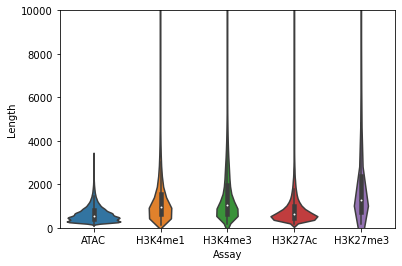

In [10]:
sns.violinplot(x="Assay", y="Length", data=all_regions)
plt.ylim(0,10000)